# Task 4.10: Coding Etiquette & Excel Reporting

### 1. Importing libraries and main/last data set.

### 2. Checking columns for PII (persanally identifiable information).

### 3. Compare customers behavior in different regions.

### 4. Create an exclusion flag for the low-activity customers.

### 5.  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### 6. Create an appropriate visualization to show the distribution of profiles.

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### 1. Importing libraries and main/last data set.

In [1]:
# Importing libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path.
path = r"C:\Users\azikb\Downloads\Data Immersion. Assiginment 4. Python. Instacart Basket Analysis"

In [3]:
# Defining a dataframe. 
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Identifying outliers for the right data set.
orders_products_all.loc[orders_products_all['prices'] > 100, 'prices'] = np.nan

In [5]:
# Checking max value
orders_products_all['prices'].max()

25.0

In [6]:
orders_products_all.loc[orders_products_all['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Frequency_flag,first_name,second_name,gender,state,age,date_joined,num_of_dependants,family_status,income


### 2. Checking columns for PII.

In [7]:
pd.options.display.max_columns = None

In [8]:
# Checking columns for personally identifiable information. Security and Etiquette.
orders_products_all.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_price,Spending_flag,days_since_prior_order_median,Frequency_flag,first_name,second_name,gender,state,age,date_joined,num_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regulary days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### As we can see columns like 'first_name' and 'second_name' could be concerned with personally identifiable information. We should be very careful with this information. 

### 3. Compare customers behavior in different regions.

In [9]:
# Let's create a list 'result' and append regions using for-loop function
result = []
for state in orders_products_all['state']: 
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']: 
        result.append('Northeast')
    elif state in ['Wisconsin', 'Michigan',  'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']: 
        result.append('Midwest')
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']: 
        result.append('South')
    else: result.append('West')

In [10]:
# Creating a column 'region'. 
orders_products_all['region'] = result

In [11]:
# Count values of 'regions'.
orders_products_all['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
# determine if there's a difference in spending habits between regions 
crosstab = pd.crosstab(orders_products_all['Spending_flag'], orders_products_all['region'], dropna = False)

In [13]:
# Copying crosstab data to clipboard.
crosstab.to_clipboard()

#### Printing out crosstab output.

Spending_flag	Midwest	 Northeast	South	    West
High spender	155975	 108225	    209691	    160354
Low spender	    7441350	 5614511	10582194	8132559

### 4. Creating an exclusion flag for the low-activity customers.

In [14]:
# Creating condition for low_activity
orders_products_all.loc[orders_products_all['max_order'] < 5, 'exclusion_flag'] = 'Low_activity'

In [15]:
# Creating condition for Regular_activity
orders_products_all.loc[orders_products_all['max_order'] >= 5, 'exclusion_flag'] = 'Regular_activity'

In [16]:
# Count groups in exclusion_flag
orders_products_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Regular_activity    30964564
Low_activity         1440295
Name: count, dtype: int64

In [17]:
# creating a 'main_customers' dataframe
main_customers = orders_products_all[orders_products_all['exclusion_flag'].isin(['Regular_activity'])]

In [18]:
# creating a 'excluded_customers' dataframe
excluded_customers = orders_products_all[orders_products_all['exclusion_flag'].isin(['Low_activity'])]

In [19]:
main_customers['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Regular_activity    30964564
Name: count, dtype: int64

In [20]:
# Exporting dataframe 'exclusion' from Jupiter
excluded_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'exclusion.pkl'))

In [106]:
# Exporting dataframe 'main_customers' from Jupiter
main_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'exclusion.pkl'))

In [21]:
# Setting the display to normal wiew, to avoid scientific notation.
pd.options.display.max_rows =  None
pd.options.display.float_format = '{:.2f}'.format

In [22]:
main_customers[['age', 'income', 'department_id', 'num_of_dependants']].describe()

,age,income,department_id,num_of_dependants
count,30964564.00,30964564.00,30964564.00,30964564.00
mean,49.47,99675.87,9.92,1.50
std,18.49,43141.87,6.28,1.12
min,18.00,25903.00,1.00,0.00
25%,33.00,67292.00,4.00,1.00
50%,49.00,96765.00,9.00,2.00
75%,65.00,128102.00,16.00,3.00
max,81.00,593901.00,21.00,3.00


### 5.  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

##### 5.1 Based on age

In [23]:
# Creating a group based on age
main_customers.loc[main_customers['age'] <= 40, 'age_type'] = 'young_person'

C:\Users\azikb\AppData\Local\Temp\ipykernel_19960\3175766132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_customers.loc[main_customers['age'] <= 40, 'age_type'] = 'young_person'


In [24]:
main_customers.loc[(main_customers['age'] >40) & (main_customers['age'] <60), 'age_type'] = 'adult_person' 

In [25]:
main_customers.loc[main_customers['age'] >= 60, 'age_type'] = 'senior_person'

In [26]:
main_customers['age_type'].value_counts(dropna = False)

age_type
young_person     11148433
senior_person    10574504
adult_person      9241627
Name: count, dtype: int64

##### 5.2 Based on income

In [27]:
# Creating a group based on income
main_customers.loc[main_customers['income'] < 50000, 'income_type'] = 'low_income'

C:\Users\azikb\AppData\Local\Temp\ipykernel_19960\1497505672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_customers.loc[main_customers['income'] < 50000, 'income_type'] = 'low_income'


In [28]:
main_customers.loc[(main_customers['income'] >= 50000) & (main_customers['income'] <100000), 'income_type'] = 'average_income' 

In [29]:
main_customers.loc[main_customers['income'] >= 100000, 'income_type'] = 'high_income'

In [30]:
main_customers['income_type'].value_counts(dropna = False)

income_type
high_income       14207402
average_income    13394608
low_income         3362554
Name: count, dtype: int64

##### 5.3 Based on dependents

In [31]:
# Checking max number of children in column
main_customers['num_of_dependants'].max()

3

In [32]:
main_customers.loc[main_customers['num_of_dependants'] <= 1, 'family_type'] = 'small_family'

C:\Users\azikb\AppData\Local\Temp\ipykernel_19960\1478367195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_customers.loc[main_customers['num_of_dependants'] <= 1, 'family_type'] = 'small_family'


In [33]:
main_customers.loc[main_customers['num_of_dependants'] == 2, 'family_type'] = 'middle_family'

In [34]:
main_customers.loc[main_customers['num_of_dependants'] >= 3, 'family_type'] = 'big_family'

In [35]:
main_customers['family_type'].value_counts(dropna = False)

family_type
small_family     15458787
big_family        7772516
middle_family     7733261
Name: count, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles.

<Axes: xlabel='age_type'>

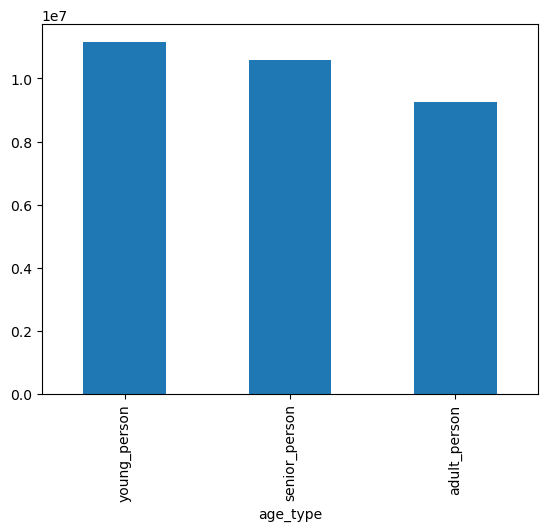

In [36]:
# Profile 'age' vizualisation
main_customers['age_type'].value_counts().plot.bar()

<Axes: xlabel='income_type'>

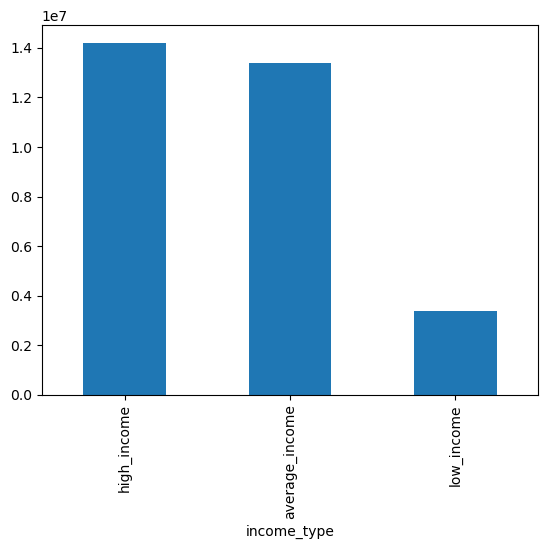

In [37]:
# Profile 'income' vizualisation
main_customers['income_type'].value_counts().plot.bar()

<Axes: xlabel='family_type'>

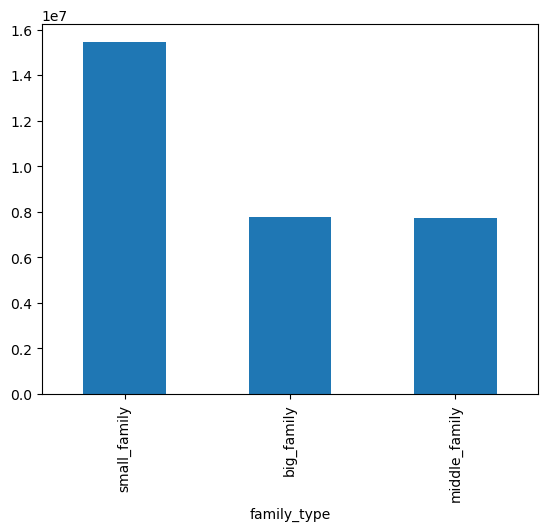

In [38]:
# Profile 'family_type' vizualisation
main_customers['family_type'].value_counts().plot.bar()

 ### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

##### 7.1 Customers profile according order_number(frequency)

In [70]:
main_customers.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'Spending_flag', 'days_since_prior_order_median', 'Frequency_flag',
       'first_name', 'second_name', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'family_status', 'income', 'region',
       'exclusion_flag', 'age_type', 'income_type', 'family_type',
       'expenditures'],
      dtype='object')

In [71]:
# Purchase frequency by age _type
main_customers.groupby('age_type').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
age_type                                       
adult_person                   10.82 0.00 30.00
senior_person                  10.80 0.00 30.00
young_person                   10.81 0.00 30.00

In [72]:
# Purchase frequency by income_type
main_customers.groupby('income_type').agg({'days_since_prior_order': ['mean', 'min', 'max']}) 

days_since_prior_order           
                                 mean  min   max
income_type                                     
average_income                  10.76 0.00 30.00
high_income                     10.77 0.00 30.00
low_income                      11.18 0.00 30.00

In [73]:
# Purchase frequency by family_type
main_customers.groupby('family_type').agg({'days_since_prior_order': ['mean', 'min', 'max']}) 

days_since_prior_order           
                                mean  min   max
family_type                                    
big_family                     10.82 0.00 30.00
middle_family                  10.83 0.00 30.00
small_family                   10.80 0.00 30.00

#####  7.2 Customers profile according sum of price (espenditures)

In [44]:
# Creating new column 'expenditures'. Column identifies sum of expenditures by each user.
main_customers['expenditures'] = main_customers.groupby('user_id')['prices'].transform(np.sum)

C:\Users\azikb\AppData\Local\Temp\ipykernel_19960\1846411099.py:1: FutureWarning: The provided callable <function sum at 0x00000232EBE83F60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  main_customers['expenditures'] = main_customers.groupby('user_id')['prices'].transform(np.sum)
C:\Users\azikb\AppData\Local\Temp\ipykernel_19960\1846411099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_customers['expenditures'] = main_customers.groupby('user_id')['prices'].transform(np.sum)


In [45]:
# Expenditure by family_type
main_customers.groupby('family_type').agg({'expenditures': ['mean', 'min', 'max']})

expenditures               
                      mean   min      max
family_type                              
big_family         3420.78 10.10 21509.20
middle_family      3387.96  7.00 26394.90
small_family       3432.29  5.00 24307.10

In [47]:
# # Expenditure by age_type
main_customers.groupby('age_type').agg({'expenditures': ['mean', 'min', 'max']})

expenditures              
                      mean  min      max
age_type                                
adult_person       3396.84 5.00 21509.20
senior_person      3407.55 6.80 26394.90
young_person       3446.38 7.00 22696.90

In [49]:
# Expenditure by income_type
main_customers.groupby('income_type').agg({'expenditures': ['mean', 'min', 'max']})

expenditures               
                       mean   min      max
income_type                               
average_income      3529.54 11.20 22696.90
high_income         3524.70 24.70 26394.90
low_income          2525.92  5.00 24307.10

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

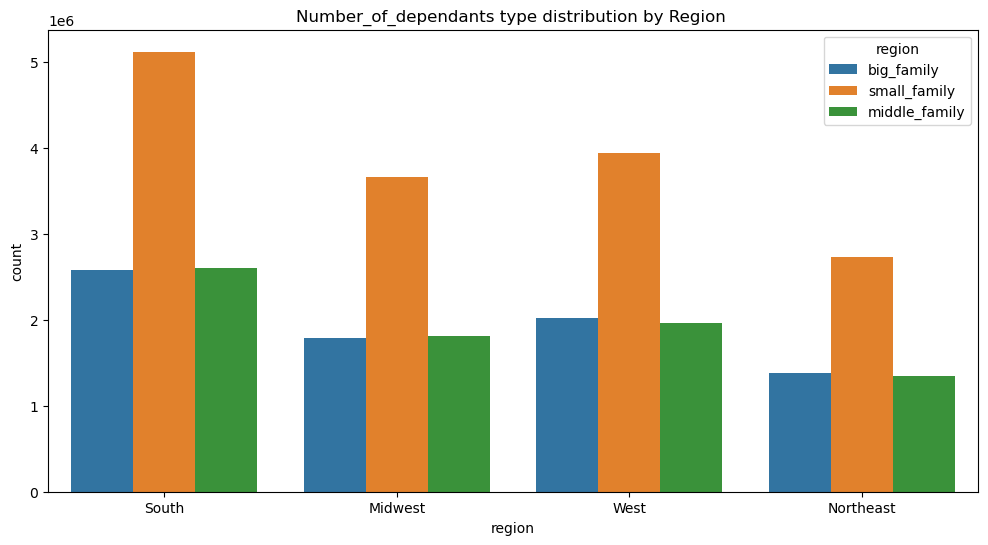

In [90]:
#  Comparing customers profile 'family_type' with region
plt.figure(figsize=(12, 6))
sns.countplot(data=main_customers, x='region', hue='family_type')
plt.title('Number_of_dependants type distribution by Region ')
plt.xlabel('region')
plt.ylabel('count')
plt.legend(title='region')
plt.show()


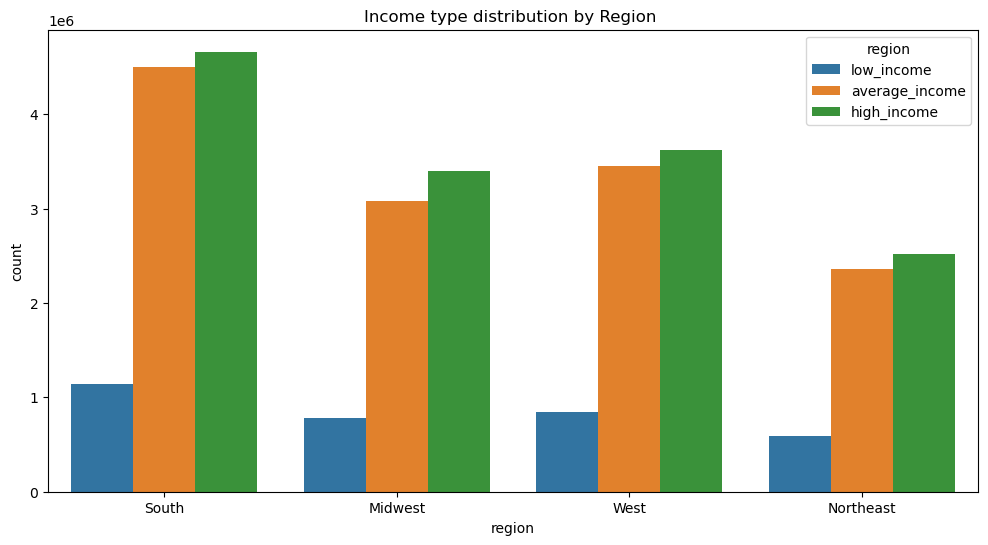

In [103]:
#  Comparing customers profile 'income_type' with region 
plt.figure(figsize=(12, 6))
countplot_income_type_region = sns.countplot(data=main_customers, x='region', hue='income_type')
plt.title('Income type distribution by Region ')
plt.xlabel('region')
plt.ylabel('count')
plt.legend(title='region')
plt.show()

In [105]:
# Exporting 'income_type' countplot by region
countplot_income_type_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'count_plot_income_type_region.png'))

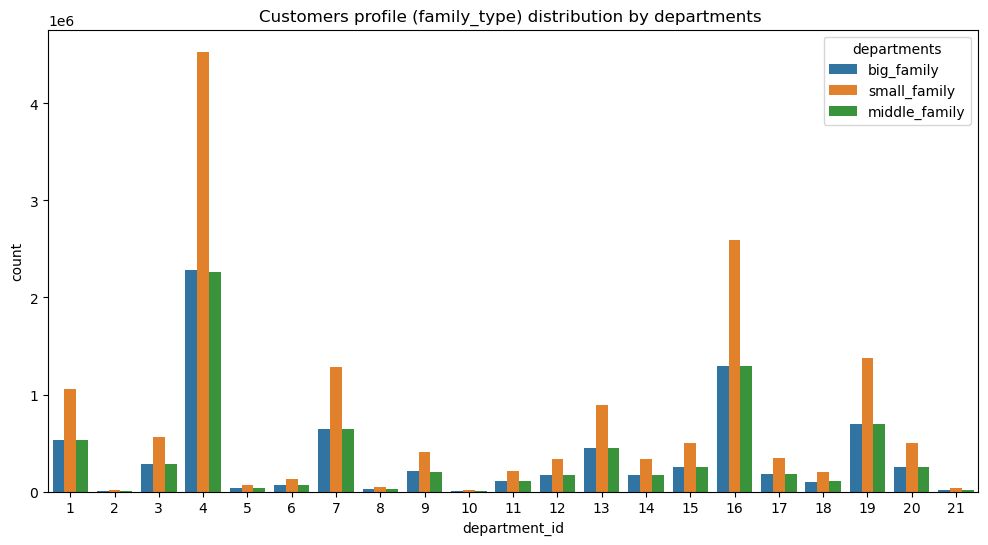

In [94]:
#  Comparing customers profile 'family_type' with department
plt.figure(figsize=(12, 6))
sns.countplot(data=main_customers, x='department_id', hue='family_type')
plt.title('Customers profile (family_type) distribution by departments ')
plt.xlabel('department_id')
plt.ylabel('count')
plt.legend(title='departments')
plt.show()

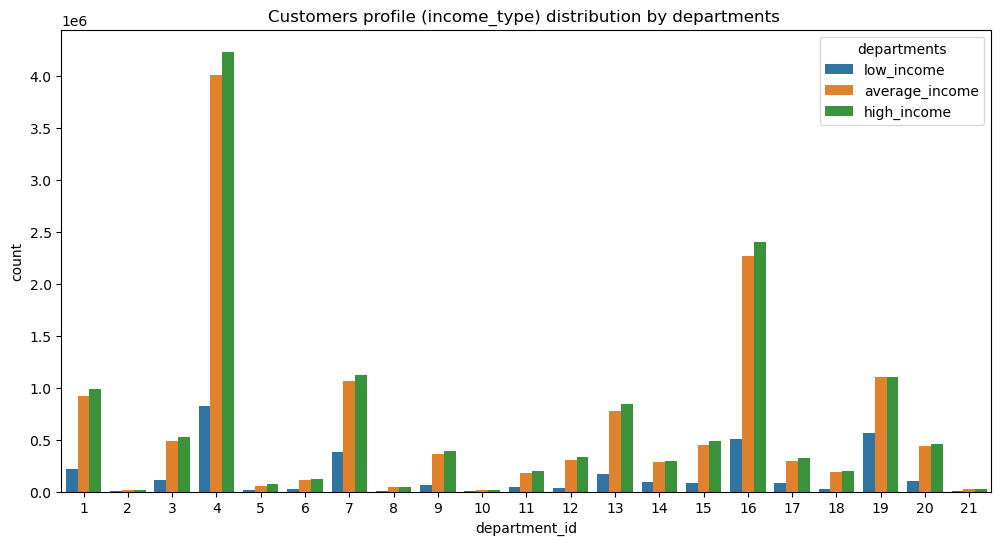

In [101]:
#  Comparing customers profile 'income' with department
plt.figure(figsize=(12, 6))
count_plot_income_type = sns.countplot(data=main_customers, x='department_id', hue='income_type')
plt.title('Customers profile (income_type) distribution by departments ')
plt.xlabel('department_id')
plt.ylabel('count')
plt.legend(title='departments')
plt.show()

In [102]:
# Exorting 'income_type' countplot
count_plot_income_type.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'count_plot_income_type.png'))

In [96]:
# Department frequency
main_customers['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

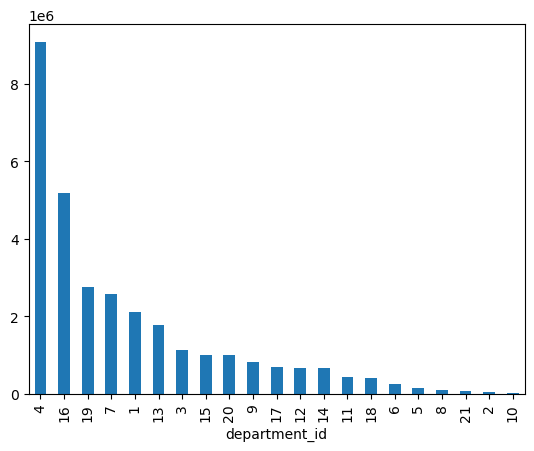

In [98]:
# Creating a 'department' frequency plot
bar_department_frequency = main_customers['department_id'].value_counts().plot.bar()

In [100]:
# Exorting bar slot
bar_department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_frequency.png'))